In [1]:
from analysis import perform_analysis
from easydict import EasyDict
# from main import *
# from main import __getMatrixNumHeaderLines

/Users/dex/anaconda/lib/python2.7/site-packages/pandas/rpy/__init__.py:11: FutureWarning: The pandas.rpy module is deprecated and will be removed in a future version. We refer to external packages like rpy2. 
See here for a guide on how to port your code to rpy2: http://pandas.pydata.org/pandas-docs/stable/r_interface.html
  FutureWarning)


In [2]:
%load_ext rmagic 
import rpy2.robjects as robjects
r = robjects.r
r.options(digits = 2)


def get_meta_analysis_from_R(geneEstimates):
    r.library("meta")
    m = r.metacont(robjects.IntVector(geneEstimates.caseDataCount),
                   robjects.FloatVector(geneEstimates.caseDataMu),
                   robjects.FloatVector(geneEstimates.caseDataSigma),
                   robjects.IntVector(geneEstimates.controlDataCount),
                   robjects.FloatVector(geneEstimates.controlDataMu),
                   robjects.FloatVector(geneEstimates.controlDataSigma),
                   studlab=robjects.StrVector(geneEstimates.gse),
                   byvar=robjects.StrVector(geneEstimates.subset),
                   bylab="subset",
                   title=geneEstimates.title
    )
    return m

def get_meta_analysis(geneEstimates):
    m = get_meta_analysis_from_R(geneEstimates)
    return parse_R_list_for_single_entries(m)

def parse_R_list_for_single_entries(rListVector):
    return dict(zip(list(rListVector.names),
                    [i[0] if i and len(i) == 1 else None for i in rListVector]))

def plot_gene(mygene_sym, fc):#myGeneSym = "ARG1"
    meta_gene = fc[fc.mygene_sym == mygene_sym].drop_duplicates(['gpl','gse'])
    meta_gene.title = mygene_sym
    m = get_meta_analysis_from_R(meta_gene)
    %R -i m -w 750 -h 500 forest(m, pred=T)

/Users/dex/anaconda/lib/python2.7/site-packages/IPython/extensions/rmagic.py:693: UserWarning: The rmagic extension in IPython is deprecated in favour of rpy2.ipython. If available, that will be loaded instead.
http://rpy.sourceforge.net/
  warnings.warn("The rmagic extension in IPython is deprecated in favour of "


In [ ]:
    analysis = EasyDict(
        analysis_name = "test",
        case_query = """Smoker == 'Smoker'""",# MS == 'MS'""",
        control_query = """Nonsmoker == 'Nonsmoker'""",#"""MS_control == 'MS_control'""",
        modifier_query = "",
        min_samples = 3
    )


In [3]:
analysis = EasyDict(
        analysis_name = "test",
        case_query = """ PHT == 'PHT' or hypertension == 'hypertension' """,
        control_query = """ PHT_Control == 'PHT_Control' or hypertension_control == 'hypertension_control' """,
        modifier_query = "",
        min_samples = 3
    )

In [4]:
fc, meta = perform_analysis(analysis=analysis, impute=False)

Started test analysis
INFO:analysis:Started test analysis
/Users/dex/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
358.78 ms in get_analysis_df(" PHT == 'PHT' or hype..., " PHT_Control == 'PHT_..., '')
DEBUG:analysis:358.78 ms in get_analysis_df(" PHT == 'PHT' or hype..., " PHT_Control == 'PHT_..., '')
359.77 ms in Loading dataframe for test
DEBUG:analysis:359.77 ms in Loading dataframe for test
Matching sources: 8
INFO:analysis:Matching sources: 8
Excluded 1 source as single-class
INFO:analysis:Excluded 1 source as single-class
Stats: 7 sources, 7 series, 6 platforms, 309 samples
INFO:analysis:Stats: 7 sources, 7 series, 6 platforms, 309 samples
Loading data and calculating fold change for test
INFO:analysi

In [13]:
results = meta.sort('random_TE').query(
"""
k>5 
""")

In [21]:
results.head()

,mygene_sym,mygene_entrez,C,H,H_lower,H_upper,I2,I2_lower,I2_upper,Q,...,predict_zscore,random_TE,random_lower,random_pval,random_se,random_upper,random_zscore,tau2,tau2_se,direction
5232,EPB41L1,2036,88384.406855,9.899510,8.446426,11.602576,0.989796,0.985983,0.992572,490.001490,...,-1.482829,-0.119344,-0.181022,0.000149,0.031469,-0.057667,-3.792466,0.005487,None,down
909,AQP4,361,7045.069737,2.656875,1.863776,3.787465,0.858337,0.712119,0.930289,35.294925,...,-0.860957,-0.063901,-0.132037,0.066045,0.034764,0.004236,-1.838120,0.004300,None,down
5380,ETS1,2113,25151.529962,4.263865,3.251304,5.591770,0.944996,0.905401,0.968018,90.902716,...,-0.959918,-0.061702,-0.114157,0.021141,0.026763,-0.009247,-2.305457,0.003415,None,down
8056,IKZF1,10320,15236.329669,3.289609,2.400063,4.508852,0.907592,0.826398,0.950811,54.107631,...,-0.975196,-0.061008,-0.112514,0.020259,0.026279,-0.009501,-2.321513,0.003223,None,down
12789,OSM,5008,6173.663580,2.478205,1.715633,3.579728,0.837173,0.660256,0.921963,30.707499,...,-0.843060,-0.060693,-0.123252,0.057233,0.031918,0.001865,-1.901528,0.004164,None,down


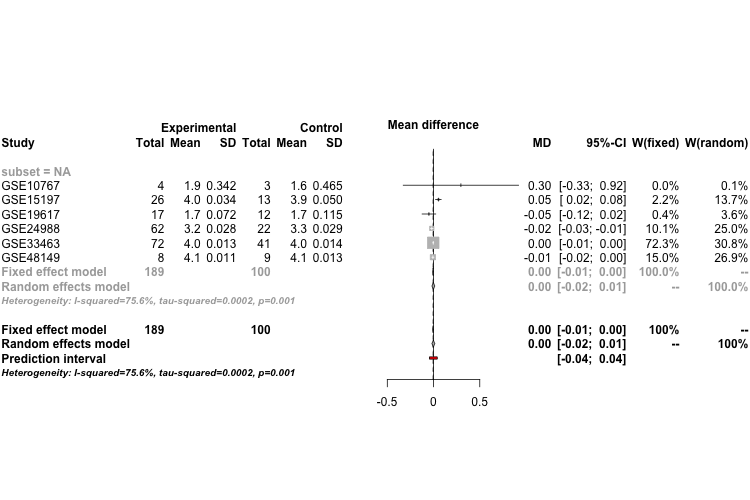

In [22]:
plot_gene("EPB41L1", fc)

In [23]:
results.tail()

,mygene_sym,mygene_entrez,C,H,H_lower,H_upper,I2,I2_lower,I2_upper,Q,...,predict_zscore,random_TE,random_lower,random_pval,random_se,random_upper,random_zscore,tau2,tau2_se,direction
7310,HBQ1,3049,12643.719683,4.089934,3.097559,5.400240,0.940218,0.895778,0.965709,83.637794,...,0.876987,0.077369,-0.000131,0.050390,0.039542,0.154870,1.956640,0.006220,None,up
7303,HBD,3045,9490.857357,3.443738,2.532951,4.682022,0.915678,0.844136,0.954382,59.296650,...,0.962267,0.081114,0.008180,0.029273,0.037212,0.154049,2.179793,0.005721,None,up
8514,KCNJ15,3772,20868.235055,4.824491,3.751096,6.205043,0.957037,0.928930,0.974028,116.378577,...,1.010121,0.081595,0.014047,0.017907,0.034464,0.149143,2.367538,0.005337,None,up
10122,LPP,4026,54786.891698,5.226500,4.112940,6.641551,0.963392,0.940885,0.977330,136.581488,...,1.561120,0.084951,0.038590,0.000329,0.023654,0.131313,3.591416,0.002402,None,up
528,ALAS2,212,4535.496656,3.210539,2.332197,4.419679,0.902984,0.816147,0.948806,51.537804,...,1.040706,0.116282,0.023859,0.013666,0.047156,0.208705,2.465926,0.010261,None,up


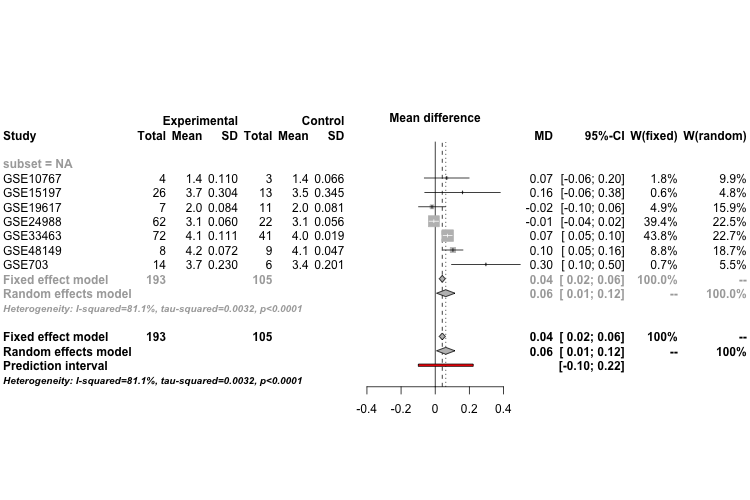

In [24]:
plot_gene("ALAS2", fc)